# Deep Learning Project on Lung Cancer Detection

This project is on chest cancer detection using deep leaning. The objective is to classify (type) and diagnose, if the patient have cancer or not with the help of AI model. So that the information about the type of cancer and the way of treatment can be provided to them.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Using Chest CT-Scan Images Dataset


This dataset is available on Kaggle on the link https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images


Data:

Images are in jpg or png format and thus can be used directly to fit the model. This dataset contain 3 chest cancer types: Adenocarcinoma,Large cell carcinoma, Squamous cell carcinoma, and 1 folder for the normal cell. Data folder consists of train, test, and valid folders.  Each folder contain 3 folders of different chest cancer types (adenocarcinoma,large cell carcinoma,squamous cell carcinoma) and 1 folder of normal CT-Scan images (normal).

*   train folder contain the training images
*   test folder contain the testing images
*   valid folder contain the validating images


The training set is 70%, testing set is 20%, and validation set is 10%.

**Dataset contains three types of lung cancer images:**

*   Adenocarcinoma (Adenocarcinoma of the lung): Lung adenocarcinoma is the most common form of lung cancer accounting for 30 percent of all cases overall and about 40 percent of all non-small cell lung cancer occurrences. Adenocarcinomas are found in several common cancers, including breast, prostate and colorectal. Adenocarcinomas of the lung are found in the outer region of the lung in glands that secrete mucus and help us breathe. Symptoms include coughing, hoarseness, weight loss and weakness.

*   Large cell carcinoma (Large-cell undifferentiated carcinoma): Large-cell undifferentiated carcinoma lung cancer grows and spreads quickly and can be found anywhere in the lung. This type of lung cancer usually accounts for 10 to 15 percent of all cases of NSCLC.

*   Squamous cell carcinoma (Squamous cell): This type of lung cancer is found centrally in the lung, where the larger bronchi join the trachea to the lung, or in one of the main airway branches. Squamous cell lung cancer is responsible for about 30 percent of all non-small cell lung cancers, and is generally linked to smoking.

And the last folder is the normal CT-Scan images

>There are 4 classes and class labels are as follows:
>
>Label 0 means Adenocarcinoma
>
>Label 1 means Large Cell Carcinoma
>
>Label 2 means Squamous Cell Carcinoma
>
>Label 3 means Normal



## Import Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
# To check which GPU is assigned
!nvidia-smi

Tue Jun 18 15:56:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# data_lung/
#     train/
#         adenocarcinoma/
#         large.cell.carcinoma/
#         squamous.cell.carcinoma/
#         normal/
#     valid/
#         adenocarcinoma/
#         large.cell.carcinoma/
#         squamous.cell.carcinoma/
#         normal/
#     test/
#         adenocarcinoma/
#         large.cell.carcinoma/
#         squamous.cell.carcinoma/
#         normal/


Set up the paths for the dataset directories:

In [ ]:
train_dir = "/content/drive/MyDrive/Datasets/Data_lung/train"
valid_dir = "/content/drive/MyDrive/Datasets/Data_lung/valid"
test_dir = "/content/drive/MyDrive/Datasets/Data_lung/test"

## Data Preprocessing
Use "ImageDataGenerator" to load and preprocess the images:

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'  # for multi-class classification
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


## Build the CNN Model
Define a CNN model:

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 classes: 3 cancer types + normal
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## Train the Model
Train the model using the training and validation data:

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)

Epoch 1/10
20/20 [==============================] - 335s 17s/step - loss: 1.4093 - accuracy: 0.3116 - val_loss: 1.2331 - val_accuracy: 0.4444
Epoch 2/10
20/20 [==============================] - 6s 288ms/step - loss: 0.9824 - accuracy: 0.5759 - val_loss: 0.8758 - val_accuracy: 0.6111
Epoch 3/10
20/20 [==============================] - 5s 242ms/step - loss: 0.6144 - accuracy: 0.7847 - val_loss: 0.7781 - val_accuracy: 0.6944
Epoch 4/10
20/20 [==============================] - 5s 242ms/step - loss: 0.4144 - accuracy: 0.8434 - val_loss: 0.9021 - val_accuracy: 0.6667
Epoch 5/10
20/20 [==============================] - 6s 279ms/step - loss: 0.3711 - accuracy: 0.8613 - val_loss: 0.6260 - val_accuracy: 0.7222
Epoch 6/10
20/20 [==============================] - 5s 241ms/step - loss: 0.2417 - accuracy: 0.9250 - val_loss: 0.5650 - val_accuracy: 0.7500
Epoch 7/10
20/20 [==============================] - 5s 273ms/step - loss: 0.2176 - accuracy: 0.9331 - val_loss: 0.8263 - val_accuracy: 0.7222
Epoch 

## Evaluate the Model
Evaluate the model on the test set:

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

10/10 [==============================] - 205s 23s/step - loss: 1.8319 - accuracy: 0.5397
Test accuracy: 0.5396825671195984


The basic CNN model defined above is not actually learning much. So, we need to train a better model.

## Data Augmentation
There are only 613 images in the training dataset, that too it comprises of 4 classes. This amount of training data wont be sufficient to train good algorithms. Hence the strength of the dataset can be increased by appropriate image augmentation techniques.

Increase the diversity of the training data to make the model more robust.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

## Improved Network Architecture
Use a deeper network with more convolutional layers and additional dropout layers to prevent overfitting

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Use of Learning Rate Schedules and Callbacks
Adjust the learning rate dynamically during training to converge faster and more reliably.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

##Transfer Learning Using VGG16 model

##VGG16 model:
VGG16 is a straightforward but powerful CNN model used for image classification tasks. It has 16 layers with learnable weights, including 13 convolutional layers that detect features in images and 3 fully connected layers that classify the images. It is known for its simplicity, uniform architecture, and effectiveness in recognizing objects in images.

The VGG16 model takes an input image of size 224x224 pixels with 3 color channels (RGB). But due to computational constraint, I will be using an input size of 128x128 with 3 color channels.

Transfer learning is particularly useful when the dataset is small.

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 [==============================] - 4s 0us/step


## Model Training with Enhanced Techniques
Combine the above improvements and train the model:

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=valid_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
20/20 [==============================] - 14s 418ms/step - loss: 1.8620 - accuracy: 0.4796 - val_loss: 0.9522 - val_accuracy: 0.5139 - lr: 0.0010
Epoch 2/20
20/20 [==============================] - 5s 244ms/step - loss: 0.6890 - accuracy: 0.7129 - val_loss: 0.6591 - val_accuracy: 0.7361 - lr: 0.0010
Epoch 3/20
20/20 [==============================] - 7s 379ms/step - loss: 0.4309 - accuracy: 0.8450 - val_loss: 0.5231 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 4/20
20/20 [==============================] - 5s 244ms/step - loss: 0.3222 - accuracy: 0.8874 - val_loss: 0.4438 - val_accuracy: 0.8611 - lr: 0.0010
Epoch 5/20
20/20 [==============================] - 5s 247ms/step - loss: 0.2544 - accuracy: 0.9103 - val_loss: 0.6732 - val_accuracy: 0.7361 - lr: 0.0010
Epoch 6/20
20/20 [==============================] - 6s 285ms/step - loss: 0.2980 - accuracy: 0.8809 - val_loss: 0.6272 - val_accuracy: 0.7639 - lr: 0.0010
Epoch 7/20
20/20 [==============================] - 5s 245ms/step - l

### Evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

10/10 [==============================] - 5s 558ms/step - loss: 1.2320 - accuracy: 0.6127
Test accuracy: 0.6126984357833862


This enhanced model makes use of Tranfer Learning by utilizing a pretrained model VGG-16 and achieves accuracy of 61.27%. But still the model is not performing very well.

## Customized SERES VGG16 Model

SERES_VGG16 is an enhanced version of the VGG16 neural network model. It combines the structure of VGG16 with additional components called Squeeze-and-Excitation (SE) blocks to improve its performance.

VGG16 Backbone:

The model starts with the VGG16 structure, which is good at identifying features in images through multiple layers of convolutions and pooling.

SE Blocks:

SE blocks are added to the VGG16 structure to make it better at distinguishing important features.

These blocks "squeeze" the information across each channel and then "excite" the network to focus more on the significant channels.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D, Reshape, Multiply
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, classification_report

Once again, we do improvised data augmentation, so that the diversity can be captured in better way.

In [ ]:
# Define Input Shape and Number of Classes
input_shape = (128,128,3)
num_classes = 4

#Data Augmentation for Training Data
train_datagen = ImageDataGenerator(
    dtype='float32',
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)

# Data Generators for Validation and Testing Data
val_datagen = ImageDataGenerator(dtype='float32')
test_datagen = ImageDataGenerator(dtype='float32')


# Create Training Data Generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
)

# Create Testing Data Generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    shuffle = False,
)

# Create Validation Data Generator
validation_generator = val_datagen.flow_from_directory(
    valid_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
)

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


## Outline of Training SERES VGG16

Integration of the SE Block into the Residual Block and incorporating it into the Last Two Output Layers of a Pre-trained VGG16 Model

## Squeeze-and-Excitation Block:

The squeeze_excitation_block function implements a squeeze-and-excitation block, which enhances the representational power of a neural network by adaptively recalibrating channel-wise feature responses.

In [ ]:
def squeeze_excitation_block(input, ratio=16):
    init = input
    channel_axis = -1
    filters = init.shape[channel_axis]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)

    x = Multiply()([init, se])
    return x

## Residual Block
The residual_block function creates a residual block with two convolutional layers and a squeeze-and-excitation block. It helps in training deep networks by allowing gradients to flow through the shortcut connections.

In [ ]:
def residual_block(x, filters, kernel_size, stride):
    shortcut = x
    x = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = squeeze_excitation_block(x)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

First, let us make sure that we have enough free space.

In [ ]:
# Ensure the model runs within 50GB disk space
import os
import psutil

def check_disk_usage():
    usage = psutil.disk_usage('/')
    free_space_gb = usage.free / (1024 ** 3)
    print(f"Free disk space: {free_space_gb:.2f} GB")
    if free_space_gb < 50:
        raise RuntimeError("Not enough disk space. Please ensure at least 50GB of free space is available.")

check_disk_usage()

Free disk space: 50.55 GB


In [ ]:
# Change input shape to (128, 128, 3)
input_tensor = Input(shape=(128, 128, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

x = vgg16.layers[-1].output
x = residual_block(x, 512, 3, 1)
x = residual_block(x, 512, 3, 1)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=predictions)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 128, 128, 64)         1792      ['input_3[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 128, 128, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)           0         ['block1_conv2[0][0]']        
                                                                                            

In [ ]:
optimizer = tf.keras.optimizers.SGD()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 100
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    verbose=1
)

Epoch 1/100
20/20 [==============================] - 13s 418ms/step - loss: 2.1134 - accuracy: 0.4046 - val_loss: 9.5361 - val_accuracy: 0.1806
Epoch 2/100
20/20 [==============================] - 9s 441ms/step - loss: 0.9934 - accuracy: 0.5856 - val_loss: 8.6844 - val_accuracy: 0.1806
Epoch 3/100
20/20 [==============================] - 9s 466ms/step - loss: 1.0252 - accuracy: 0.5579 - val_loss: 1.9934 - val_accuracy: 0.1944
Epoch 4/100
20/20 [==============================] - 9s 437ms/step - loss: 0.8787 - accuracy: 0.5889 - val_loss: 1.4872 - val_accuracy: 0.2222
Epoch 5/100
20/20 [==============================] - 10s 486ms/step - loss: 0.8750 - accuracy: 0.5546 - val_loss: 3.2531 - val_accuracy: 0.1944
Epoch 6/100
20/20 [==============================] - 9s 461ms/step - loss: 0.8415 - accuracy: 0.6003 - val_loss: 1.8143 - val_accuracy: 0.2222
Epoch 7/100
20/20 [==============================] - 8s 394ms/step - loss: 0.9646 - accuracy: 0.5824 - val_loss: 3.8809 - val_accuracy: 0.19

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test accuracy:', test_accuracy)

10/10 [==============================] - 154s 17s/step - loss: 0.4218 - accuracy: 0.8921
Test accuracy: 0.8920634984970093


10/10 [==============================] - 3s 249ms/step


Confusion Matrix:
 [[108  12   0   0]
 [  0  51   0   0]
 [  0   0  54   0]
 [ 15   6   1  68]]


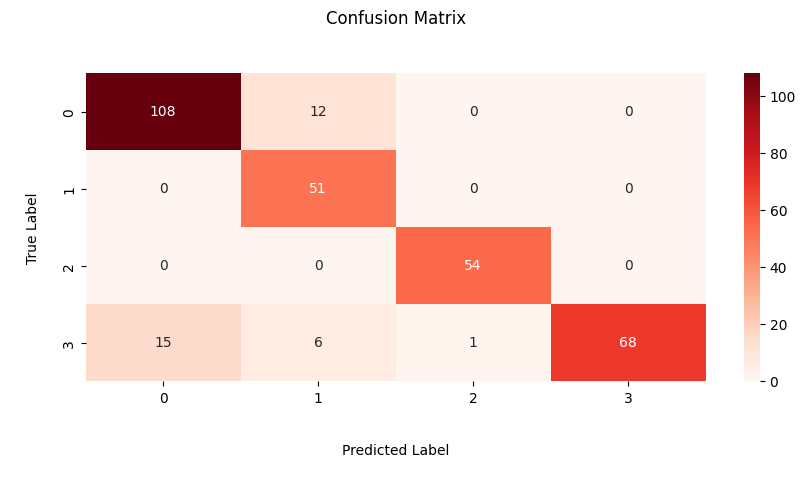

In [ ]:
num_test_samples = len(test_generator)
num_classes = len(test_generator.class_indices)
predicted_probabilities = model.predict(test_generator, steps=num_test_samples)
predicted_labels = np.argmax(predicted_probabilities, axis=1)
true_labels = test_generator.classes
cm = confusion_matrix(true_labels, predicted_labels)
print("\n\nConfusion Matrix:\n", cm)

plt.figure(figsize=(10,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds')
plt.xlabel('\n\nPredicted Label\n')
plt.ylabel('\nTrue Label\n')
plt.title('Confusion Matrix\n\n')
plt.show()

>## One positive and important thing to observe here is that no cancer patient's CT scan is classified as normal.
>Only errors are in classifying the type of lung cancer which can further be improved later.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

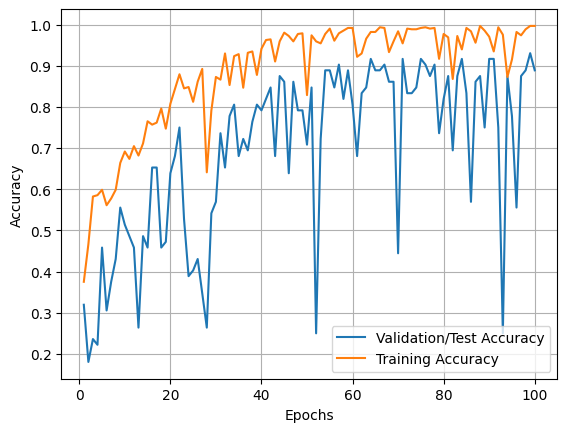

In [ ]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

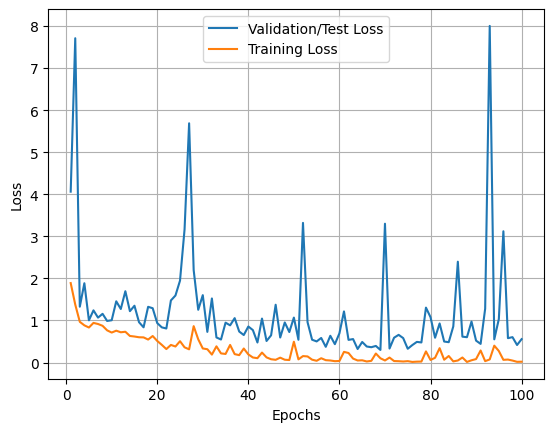

In [ ]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       120
           1       0.74      1.00      0.85        51
           2       0.98      1.00      0.99        54
           3       1.00      0.76      0.86        90

    accuracy                           0.89       315
   macro avg       0.90      0.91      0.90       315
weighted avg       0.91      0.89      0.89       315



## Save the Model
Save the trained model for future use:

In [ ]:
model.save('lung_cancer_detection_model.h5')

## Conculsion

Created a robust model capable of accurately diagnosing lung cancer and providing valuable insights into its type for better treatment planning.

The Customized SERES VGG16 model performs best with an accuracy of 89%.